#Shoe Image Classification using CNN

##Importing Libraries

In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools


import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.9.1


In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

##Extracting data and Creating Dataset

Defining the folder names

In [3]:
# DATASET = "train"  # this folde must contain three subfolder with images
# MODEL = "Scene.model" # name to store the model on disk
# PLOT = "plot.png" # plot name

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/MyDrive/Datasets")

In [6]:
!dir

ANN  flagged  test   test2  test.zip  train1  train3
CNN  RNN      test1  test3  train     train2  train.zip


In [7]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.6 MB/s 


In [8]:
import patoolib
patoolib.extract_archive("train.zip")

patool: Extracting train.zip ...
patool: running /usr/bin/7z x -o./Unpack__rnqv7as -- train.zip
patool: ... train.zip extracted to `train4' (local file exists).


'train4'

In [9]:
patoolib.extract_archive("test.zip")

patool: Extracting test.zip ...
patool: running /usr/bin/7z x -o./Unpack_dzw1_ena -- test.zip
patool: ... test.zip extracted to `test4' (local file exists).


'test4'

##Data Labelling

In [10]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
DATASET = "train"

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Boots":
            label = 0
        elif label == "Sandals":
            label = 1
        elif label == "Slippers":
            label = 2

        # print("pr: ", label)	

        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/778 [00:00<?, ?it/s]

###Testing

In [11]:
data[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 13.,  20.,  29.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [186., 178., 180.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [ 20.,  23.,  24.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [122., 127., 129.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [253., 2

In [12]:
data[0].shape

(28, 28, 3)

In [13]:
labels[0]

1

In [14]:
data[9]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

###Converting to array

In [15]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [16]:
labels

array([1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2,

##Train and Validation Split

In [17]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [18]:
Shape = [trainX.shape, testX.shape, trainY.shape, testY.shape]
Split_name = ["trainX", "testX", "trainY", "testY"]

mapped_list = list(zip(Shape, Split_name))

for X in mapped_list:
    print(f"The shape of {X[0]} is {X[1]}.")

The shape of (583, 28, 28, 3) is trainX.
The shape of (195, 28, 28, 3) is testX.
The shape of (583,) is trainY.
The shape of (195,) is testY.


###Transforming the labels

In [19]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [20]:
#testing
trainY[0]

array([1., 0., 0.], dtype=float32)

## Data Preprocessing (Augumentation)

In [21]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

###Model Architecture

In [22]:
# create CNN Model

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


In [23]:
#defining epochs, learning rate and batchsize
EPOCHS = 50
INIT_LR = 1e-3
BS = 32

In [24]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")


[INFO] compiling model...
[INFO] model complied...


##Model Summary

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

All the params are trainable

##Training the Model

In [26]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=50, 
              verbose=1)

[INFO] training network...
Epoch 1/50
18/18 [==============================] - 5s 208ms/step - loss: 1.0718 - accuracy: 0.4138 - val_loss: 1.0231 - val_accuracy: 0.4000
Epoch 2/50
18/18 [==============================] - 3s 137ms/step - loss: 0.8818 - accuracy: 0.6062 - val_loss: 0.6019 - val_accuracy: 0.7282
Epoch 3/50
18/18 [==============================] - 2s 127ms/step - loss: 0.7004 - accuracy: 0.6824 - val_loss: 0.5432 - val_accuracy: 0.7897
Epoch 4/50
18/18 [==============================] - 2s 126ms/step - loss: 0.6238 - accuracy: 0.7296 - val_loss: 0.5627 - val_accuracy: 0.8000
Epoch 5/50
18/18 [==============================] - 2s 136ms/step - loss: 0.5867 - accuracy: 0.7405 - val_loss: 0.4763 - val_accuracy: 0.7590
Epoch 6/50
18/18 [==============================] - 2s 132ms/step - loss: 0.5957 - accuracy: 0.7495 - val_loss: 0.4076 - val_accuracy: 0.8615
Epoch 7/50
18/18 [==============================] - 2s 132ms/step - loss: 0.5378 - accuracy: 0.7659 - val_loss: 0.4665 - 

## Evaluation based on Validation Accuracy

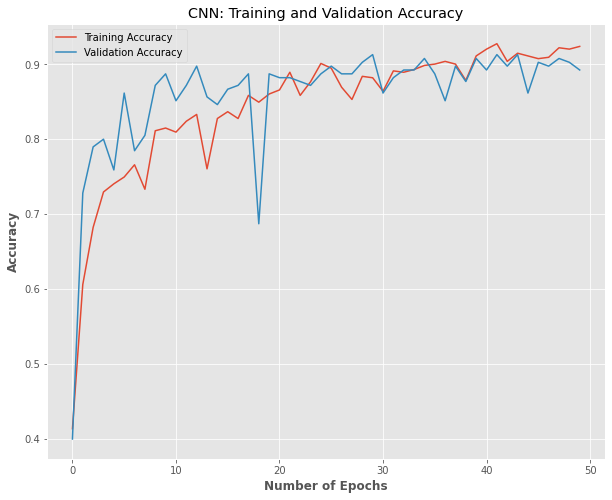

In [27]:
# plot the training and validation accuracy
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="Training Accuracy")
plt.plot(N, H.history["val_accuracy"], label="Validation Accuracy")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Number of Epochs", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()



*  The training and validation accuracy are similar through the increase in epochs indicating that the model is not over-fitted

*   The Accuracy increased with the number of epochs until it reached 90%, post which a stability could be seen

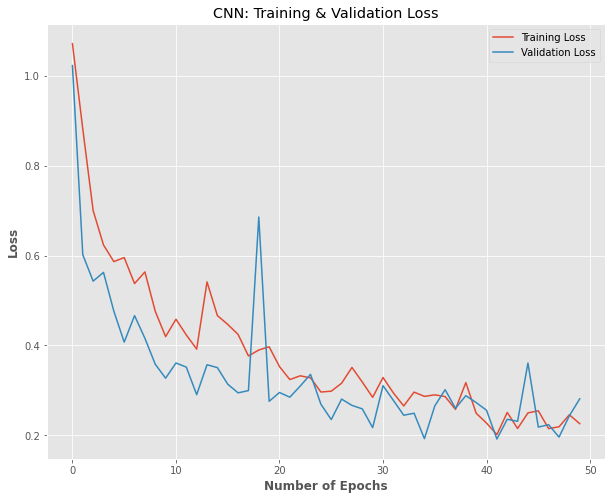

In [28]:
# plot the training and validation loss
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="Training Loss")
plt.plot(N, H.history["val_loss"], label="Validation Loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Number of Epochs", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

The loss went on decreasing with the increase in the number of epochs

##Saving Model

In [29]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [30]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 2 categorical folders

all_class = ["Boots", "Sandals", "Slippers"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf = model.predict(image)[0]

        # build the label
        label = all_class[np.argmax(prd_conf)]
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

##Deployment

In [36]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image
    
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

        
    preds = model.predict(image)[0]
    result = dict()
    result["Boots"] = round(float(list(preds)[0]), 3)
    result["Sandals"] = round(float(list(preds)[1]), 3)
    result["Slippers"] = round(float(list(preds)[2]), 3)
    
    print(result)
    
    return result

In [37]:
# Define the input and output types for the model
inputs = gr.inputs.Image(shape=(32,32))
outputs = gr.outputs.Label(num_top_classes=3)
labels=["Boots", "Sandals", "Slippers"]

# Create the interface
interface = gr.Interface(predict_image, inputs, outputs, capture_session=True, title="Shoe Classification")

# Launch the interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1eb209e9-5c7e-43cf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
